# Machine Learning Models

## Load the data

In [5]:
## Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import joblib
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
# here you can load the data of 2022 or 2023
all = pd.read_csv('all2022new_no_outlier.csv')
print(all.shape)
all.head()

(22989, 74)


,bib,name,age,city,state,country,5k,10k,15k,20k,Half,25k,30k,35k,40k,pace,finish,pos_overall,pos_gender,pos_age_group,delta_finish,datetime_finish,all_format_finish,delta_finish_seconds,finish_minutes,5k_minutes,10k_minutes,15k_minutes,20k_minutes,Half_minutes,25k_minutes,30k_minutes,35k_minutes,40k_minutes,gender,gender_F,gender_M,age_group,avg_pace_to_5k,avg_pace_to_10k,avg_pace_to_15k,avg_pace_to_20k,avg_pace_to_21.1k,avg_pace_to_25k,avg_pace_to_30k,avg_pace_to_35k,avg_pace_to_40k,avg_pace_to_42.2k,std_at_10k,std_at_15k,std_at_20k,std_at_21_1k,std_at_25k,std_at_30k,std_at_35k,std_at_40k,std_at_42_2k,mean_at_10k,mean_at_15k,mean_at_20k,mean_at_25k,mean_at_30k,mean_at_35k,mean_at_40k,mean_at_42_2k,perc_decay_5k_to_10k,perc_decay_10k_to_15k,perc_decay_15k_to_20k,perc_decay_20k_to_21_1k,perc_decay_21_1k_to_25k,perc_decay_25k_to_30k,perc_decay_30k_to_35k,perc_decay_35k_to_40k,perc_decay_40k_to_42_2k
0,57,"Atanaw, Kinde",29,ETH,NaN,NaN,0:14:57,0:29:39,0:44:44,1:00:02,1:03:26,1:15:28,1:30:59,1:46:33,2:01:39,0:04:56,2:09:16,10.0,10.0,10.0,0 days 02:09:16,2023-11-21 02:09:16,1900-01-01 02:09:16,7756.0,129.27,14.95,29.65,44.73,60.03,63.43,75.47,90.98,106.55,121.65,male,0,1,1,20.07,20.24,20.12,19.99,19.96,19.88,19.78,19.71,19.73,19.58,0.12,0.09,0.10,0.11,0.13,0.15,0.18,0.18,0.21,20.16,20.14,20.10,20.04,20.01,19.97,19.94,19.91,0.84,-0.57,-0.65,-0.16,-0.42,-0.46,-0.38,0.10,-0.73
1,29,"Albertson, Cj",28,Fresno,CA,USA,0:14:55,0:29:39,0:44:43,1:00:01,1:03:24,1:15:25,1:30:59,1:46:46,2:03:01,0:04:59,2:10:23,13.0,13.0,13.0,0 days 02:10:23,2023-11-21 02:10:23,1900-01-01 02:10:23,7823.0,130.38,14.92,29.65,44.72,60.02,63.40,75.42,90.98,106.77,123.02,male,0,1,1,20.11,20.24,20.13,19.99,19.97,19.89,19.78,19.67,19.51,19.42,0.09,0.07,0.10,0.11,0.13,0.16,0.19,0.23,0.27,20.17,20.16,20.12,20.05,20.02,19.97,19.92,19.87,0.64,-0.55,-0.66,-0.12,-0.40,-0.52,-0.59,-0.81,-0.47
2,292,"Adams, Micah",30,Provo,UT,USA,0:16:51,0:33:35,0:50:12,1:07:21,1:11:03,1:24:23,1:42:02,2:00:13,2:18:09,0:05:36,2:26:30,63.0,53.0,51.0,0 days 02:26:30,2023-11-21 02:26:30,1900-01-01 02:26:30,8790.0,146.50,16.85,33.58,50.20,67.35,71.05,84.38,102.03,120.22,138.15,male,0,1,1,17.80,17.87,17.93,17.82,17.82,17.78,17.64,17.47,17.37,17.28,0.05,0.07,0.06,0.05,0.05,0.09,0.15,0.19,0.23,17.84,17.87,17.86,17.84,17.81,17.77,17.72,17.68,0.36,0.34,-0.62,0.01,-0.23,-0.76,-0.99,-0.55,-0.52
3,427,"Abasolo, Brandon",31,Moraga,CA,USA,0:17:13,0:34:26,0:51:55,1:09:18,1:13:03,1:26:29,1:44:00,2:01:54,2:20:14,0:05:41,2:28:39,98.0,86.0,80.0,0 days 02:28:39,2023-11-21 02:28:39,1900-01-01 02:28:39,8919.0,148.65,17.22,34.43,51.92,69.30,73.05,86.48,104.00,121.90,140.23,male,0,1,1,17.42,17.43,17.33,17.32,17.33,17.35,17.31,17.23,17.11,17.03,0.01,0.06,0.06,0.05,0.05,0.05,0.06,0.10,0.13,17.42,17.39,17.38,17.36,17.36,17.34,17.31,17.29,0.03,-0.53,-0.11,0.08,0.08,-0.22,-0.46,-0.65,-0.49
4,443,"Alexander, Daniel",33,Newcastle Upon Tyne,GBR,NaN,0:16:15,0:33:07,0:50:20,1:07:53,1:11:41,1:25:20,1:43:26,2:02:06,2:20:39,0:05:41,2:28:39,99.0,87.0,81.0,0 days 02:28:39,2023-11-21 02:28:39,1900-01-01 02:28:39,8919.0,148.65,16.25,33.12,50.33,67.88,71.68,85.33,103.43,122.10,140.65,male,0,1,1,18.46,18.12,17.88,17.68,17.66,17.58,17.40,17.20,17.06,17.03,0.24,0.29,0.34,0.34,0.34,0.36,0.40,0.44,0.46,18.29,18.15,18.03,17.90,17.83,17.75,17.67,17.61,-1.87,-1.29,-1.14,-0.09,-0.47,-1.00,-1.17,-0.79,-0.19


In [3]:
all.columns

Index(['bib', 'age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
       'Half_minutes', '25k_minutes', '30k_minutes', '35k_minutes',
       '40k_minutes', 'gender_F', 'gender_M', 'finish_minutes', 'age_group',
       'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'avg_pace_to_25k',
       'avg_pace_to_30k', 'avg_pace_to_35k', 'avg_pace_to_40k',
       'avg_pace_to_42.2k', 'std_at_10k', 'std_at_15k', 'std_at_20k',
       'std_at_21_1k', 'std_at_25k', 'std_at_30k', 'std_at_35k', 'std_at_40k',
       'std_at_42_2k', 'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
       'mean_at_25k', 'mean_at_30k', 'mean_at_35k', 'mean_at_40k',
       'mean_at_42_2k', 'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k',
       'perc_decay_21_1k_to_25k', 'perc_decay_25k_to_30k',
       'perc_decay_30k_to_35k', 'perc_decay_35k_to_40k',
       'perc_decay_40k_to_42_2k'],
      dtype='ob

## Split data to all intermediate points

In [3]:
point_5k = all[['bib', 'age', '5k_minutes','gender_F', 'gender_M','finish_minutes','avg_pace_to_5k']]

In [9]:
point_10k = all[['bib', 'age', '5k_minutes', '10k_minutes', 'gender_F', 'gender_M', 'finish_minutes','avg_pace_to_5k', 'avg_pace_to_10k','std_at_10k', 'mean_at_10k','perc_decay_5k_to_10k']]

In [14]:
point_15k = all[['bib', 'age', 'age_group','5k_minutes', '10k_minutes', '15k_minutes',
       'gender_F', 'gender_M', 'finish_minutes',
       'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
       'std_at_10k', 'std_at_15k', 'mean_at_10k', 'mean_at_15k', 
       'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k']]

In [15]:
point_20k = all[['bib', 'age', 'age_group','5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
       'gender_F', 'gender_M', 'finish_minutes',
       'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
       'avg_pace_to_20k','std_at_10k', 'std_at_15k', 'std_at_20k',
       'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
       'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
       'perc_decay_15k_to_20k']]

In [4]:
point_5k.to_csv('data/point_5k.csv', index=False)

In [16]:
point_21_1k = all[['bib', 'age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
       'Half_minutes', 'gender_F', 'gender_M', 'finish_minutes','avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'std_at_10k', 'std_at_15k', 'std_at_20k',
       'std_at_21_1k', 'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
       'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k']]

In [8]:
point_25k = all[['bib', 'age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
       'Half_minutes', '25k_minutes', 'gender_F', 'gender_M', 'finish_minutes', 
       'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'avg_pace_to_25k', 'std_at_10k', 'std_at_15k', 'std_at_20k',
       'std_at_21_1k', 'std_at_25k', 'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
       'mean_at_25k', 'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k','perc_decay_21_1k_to_25k']]

In [9]:
point_30k = all[['bib', 'age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
       'Half_minutes', '25k_minutes', '30k_minutes', 'gender_F', 'gender_M', 'finish_minutes', 
       'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'avg_pace_to_25k',
       'avg_pace_to_30k', 'std_at_10k', 'std_at_15k', 'std_at_20k',
       'std_at_21_1k', 'std_at_25k', 'std_at_30k', 'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
       'mean_at_25k', 'mean_at_30k', 'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k',
       'perc_decay_21_1k_to_25k', 'perc_decay_25k_to_30k']]

In [10]:
point_35k = all[['bib', 'age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
       'Half_minutes', '25k_minutes', '30k_minutes', '35k_minutes',
       'gender_F', 'gender_M', 'finish_minutes', 
       'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'avg_pace_to_25k',
       'avg_pace_to_30k', 'avg_pace_to_35k', 'std_at_10k', 'std_at_15k', 'std_at_20k',
       'std_at_21_1k', 'std_at_25k', 'std_at_30k', 'std_at_35k', 'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
       'mean_at_25k', 'mean_at_30k', 'mean_at_35k', 'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k',
       'perc_decay_21_1k_to_25k', 'perc_decay_25k_to_30k',
       'perc_decay_30k_to_35k']]

In [11]:
point_40k = all[['bib', 'age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
       'Half_minutes', '25k_minutes', '30k_minutes', '35k_minutes',
       '40k_minutes', 'gender_F', 'gender_M', 'finish_minutes', 'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'avg_pace_to_25k',
       'avg_pace_to_30k', 'avg_pace_to_35k', 'avg_pace_to_40k',
       'std_at_10k', 'std_at_15k', 'std_at_20k',
       'std_at_21_1k', 'std_at_25k', 'std_at_30k', 'std_at_35k', 'std_at_40k',
       'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
       'mean_at_25k', 'mean_at_30k', 'mean_at_35k', 'mean_at_40k',
       'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k',
       'perc_decay_21_1k_to_25k', 'perc_decay_25k_to_30k',
       'perc_decay_30k_to_35k', 'perc_decay_35k_to_40k']]

In [5]:
point_5k.columns

Index(['bib', 'age', '5k_minutes', 'gender_F', 'gender_M', 'finish_minutes',
       'avg_pace_to_5k'],
      dtype='object')

## (5k) Create X_train, X_test, y_train, y_test 

In [5]:
# Data Preparation

features = ['5k_minutes','gender_M', 'gender_F','avg_pace_to_5k']

target = 'finish_minutes'

# Select features and target variable
X = point_5k[features]
y = point_5k[target]

# Scale the features
scaler_lr_5k = MinMaxScaler()
X_scaled = scaler_lr_5k.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Linear Regression model
# X_train_2d = X_train.reshape(X_train.shape[0], -1)
# X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create Linear Regression model with the best hyperparameters
model_lr_5k = LinearRegression(fit_intercept=False, normalize=True)

# Fit the model to the training data
model_lr_5k.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

## (5k) Check RMSE and MAE of the Linear Regression Model

In [6]:
# Make predictions using the best model
y_pred = model_lr_5k.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')

RMSE of the best Linear Regression model: 11.854840811298576
MAE of the best Linear Regression model: 8.594574828663076


## (5k) Tune hyperparameters of the Linear Regression Model (optional)

In [6]:
# Linear Regression - RMSE: 11.941475211220322
# Random Forest - RMSE: 13.18875372959538
# SVR - RMSE: 12.01505174472466
# KNN - RMSE: 12.662078396389113
# Neural Network - RMSE: 11.92583459488469

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept
    'normalize': [True, False]       # Normalize the features
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
model_lr_5k = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = model_lr_5k.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Linear Regression model: 11.735621960189633
MAE of the best Linear Regression model: 8.49230884576008
Best hyperparameters:
fit_intercept: False
normalize: True


## (5k) Train & Save the model (& scaler)

In [7]:
# Save the model to a file using joblib or pickle
import joblib

joblib.dump(model_lr_5k, 'model_lr_5k.pkl')
joblib.dump(scaler_lr_5k, 'scaler_lr_5k.pkl')


['scaler_lr_5k.pkl']

## (5k) Alternative 1a - Make a prediction with the 5k model

In [7]:
# Prediction: [162.44243422]
# Make a prediction for the given input data
# Input data: ['age', '5k_minutes','gender_F', 'gender_M', 'avg_pace_to_5k']
input_data = np.array([[41, 18.48, 0,1, 16.23]])

# Create a DataFrame with feature names
input_df = pd.DataFrame(input_data, columns=['age', '5k_minutes','gender_F','gender_M','avg_pace_to_5k'])

# Scale the input data using the same scaler
input_data_scaled = scaler_lr_5k.transform(input_df)

# Make the prediction
prediction = model_lr_5k.predict(input_data_scaled)

# Display the prediction
print("Prediction:", prediction)

Prediction: [162.44243422]


## (5k) Alternative 1b - Make a prediction with the 5k model being loaded separately

In [10]:
# Prediction: [162.44243422]
# Make a prediction for the given input data
# Input data: ['age', '5k_minutes','gender_F', 'gender_M', 'avg_pace_to_5k']

# Load the 5k model
model_lr_5k = joblib.load('model_lr_5k.pkl')
scaler_lr_5k = joblib.load('scaler_lr_5k.pkl')

input_data = np.array([[41, 18.48, 0, 1,16.23]])

# Create a DataFrame with feature names
input_df = pd.DataFrame(input_data, columns=['age', '5k_minutes','gender_F', 'gender_M', 'avg_pace_to_5k'])

# Scale the input data using the same scaler
input_data_scaled = scaler_lr_5k.transform(input_df)

# Make the prediction
prediction = model_lr_5k.predict(input_data_scaled)

# Display the prediction
print("Prediction:", prediction)

Prediction: [162.44243422]


## (5k) Load the model and predict

In [18]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the 5k model
model_lr_5k = joblib.load('model_lr_5k.pkl')

# Make a prediction for the given input data
# Input data style: ['age', '5k_minutes','gender_F', 'gender_M', 'avg_pace_to_5k']
input_data = np.array([[41, 18.48, 0, 1, 16.23]])
scaler = MinMaxScaler()
input_data = scaler.fit_transform(input_data)

# Create a DataFrame with feature names
input_df = pd.DataFrame(input_data, columns=['age', '5k_minutes', 'gender_F', 'gender_M', 'avg_pace_to_5k'])

# Fit the scaler on the input data
# scaler.fit_transform(input_df)

# Make the prediction
prediction = model_lr_5k.predict(input_df)

# Display the prediction
print("Prediction:", prediction)

Prediction: [0.]


## (5k-40k) Load a model and test it on 2022 data

In [17]:
## Note: Make sure the csv of 2022 was loaded (all2022new_no_outlier.csv)
# 5k: features = ['5k_minutes','gender_M', 'gender_F','avg_pace_to_5k']
# 10k: features = ['5k_minutes','10k_minutes','perc_decay_5k_to_10k','gender_M', 'gender_F']
# 15k: features = ['10k_minutes','15k_minutes','perc_decay_10k_to_15k','gender_M', 'gender_F']
# 20k: features = ['15k_minutes','20k_minutes','perc_decay_15k_to_20k','gender_M', 'gender_F']
# 21_1k: features = ['20k_minutes','Half_minutes','perc_decay_20k_to_21_1k','gender_M', 'gender_F']
# 25k: features = ['Half_minutes','25k_minutes','perc_decay_21_1k_to_25k','gender_M', 'gender_F']
# 30k: features = ['25k_minutes','30k_minutes','perc_decay_25k_to_30k','gender_M', 'gender_F']
# 35k: features = ['30k_minutes','35k_minutes','perc_decay_30k_to_35k','gender_M','gender_F']
# 40k: features = ['35k_minutes','40k_minutes','perc_decay_35k_to_40k','gender_M', 'gender_F']

## Note: Make sure the csv of 2022 was loaded (all2022new_no_outlier.csv)

# Load the 15k model and scaler
model_lr_15k = joblib.load('model_lr_15k.pkl')
scaler_lr_15k = joblib.load('scaler_lr_15k.pkl')

# Data Preparation
features = ['10k_minutes','15k_minutes','perc_decay_10k_to_15k','gender_M', 'gender_F']
target = 'finish_minutes'

# Select features and target variable
X_test = point_15k[features]
y_test = point_15k[target]

# Scale the features
X_scaled = scaler_lr_15k.transform(X_test)

# Make predictions using the best model
y_pred = model_lr_15k.predict(X_scaled)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')

RMSE of the best Linear Regression model: 10.904022898649133
MAE of the best Linear Regression model: 7.297031978160072


In [9]:
my_vars = [model_lr_5k,input_data,input_df,input_data_scaled,prediction]
for var in my_vars:
    print(type(var))

<class 'sklearn.linear_model._base.LinearRegression'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
input_df

NameError: name 'input_df' is not defined

## (5k) Tune hyperparameters of the Random Forest Model

In [6]:
# Linear Regression - RMSE: 11.941475211220322
# Random Forest - RMSE: 13.18875372959538
# SVR - RMSE: 12.01505174472466
# KNN - RMSE: 12.662078396389113
# Neural Network - RMSE: 11.92583459488469

# Create a Random Forest model
model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Random Forest model: {rmse}')
print(f'MAE of the best Random Forest model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Random Forest model: 11.85791982875653
MAE of the best Random Forest model: 8.543027392995002
Best hyperparameters:
max_depth: 10
max_features: sqrt
min_samples_leaf: 4
min_samples_split: 2
n_estimators: 200


## (10k) Create X_train, X_test, y_train, y_test

In [15]:
# Data Preparation
# ['bib', 'age', '5k_minutes', '10k_minutes', 'gender_F', 'gender_M', 'finish_minutes','avg_pace_to_5k', 
# 'avg_pace_to_10k','std_at_10k', 'mean_at_10k','perc_decay_5k_to_10k']

features = ['5k_minutes','10k_minutes','perc_decay_5k_to_10k','gender_M', 'gender_F']

target = 'finish_minutes'

# Select features and target variable
X = point_10k[features]
y = point_10k[target]

# Scale the features
scaler_lr_10k = MinMaxScaler()
X_scaled = scaler_lr_10k.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Linear Regression model
# X_train_2d = X_train.reshape(X_train.shape[0], -1)
# X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create Linear Regression model with the best hyperparameters
model_lr_10k = LinearRegression(fit_intercept=False, normalize=True)

# Fit the model to the training data
model_lr_10k.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

## (10k) Tune hyperparameters of the Linear Regression Model

In [6]:
# Linear Regression - RMSE: 10.196061705064082
# Random Forest - RMSE: 10.683151064656027
# SVR - RMSE: 10.29510105917638
# KNN - RMSE: 10.915537111323596
# Neural Network - RMSE: 10.157401267852846

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept
    'normalize': [True, False]       # Normalize the features
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Linear Regression model: 9.93486201737597
MAE of the best Linear Regression model: 7.154524133407156
Best hyperparameters:
fit_intercept: False
normalize: True


## (10k) Tune hyperparameters of the Random Forest Model

In [7]:
# Linear Regression - RMSE: 10.196061705064082
# Random Forest - RMSE: 10.683151064656027
# SVR - RMSE: 10.29510105917638
# KNN - RMSE: 10.915537111323596
# Neural Network - RMSE: 10.157401267852846

# Create a Random Forest model
model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Random Forest model: {rmse}')
print(f'MAE of the best Random Forest model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Random Forest model: 9.993605646488973
MAE of the best Random Forest model: 7.162038524030037
Best hyperparameters:
max_depth: 10
max_features: sqrt
min_samples_leaf: 4
min_samples_split: 5
n_estimators: 200


## (10k) Save the Model and the Scaler

In [16]:
# Save the model to a file using joblib or pickle
import joblib

joblib.dump(model_lr_10k, 'model_lr_10k.pkl')
joblib.dump(scaler_lr_10k, 'scaler_lr_10k.pkl')

['scaler_lr_10k.pkl']

## (15k) Create X_train, X_test, y_train, y_test

In [17]:
# Data Preparation

# features = ['age', 'age_group','5k_minutes', '10k_minutes', '15k_minutes','gender_F', 'gender_M', 
#       'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k','std_at_10k', 'std_at_15k', 'mean_at_10k', 'mean_at_15k', 
#       'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k']

features = ['10k_minutes','15k_minutes','perc_decay_10k_to_15k','gender_M', 'gender_F']

target = 'finish_minutes'

# Select features and target variable
X = point_15k[features]
y = point_15k[target]

# Scale the features
scaler_lr_15k = MinMaxScaler()
X_scaled = scaler_lr_15k.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Linear Regression model
# X_train_2d = X_train.reshape(X_train.shape[0], -1)
# X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create Linear Regression model with the best hyperparameters
model_lr_15k = LinearRegression(fit_intercept=False, normalize=True)

# Fit the model to the training data
model_lr_15k.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

## (15k) Tune hyperparameters of the Linear Regression Model

In [11]:
# Linear Regression - RMSE: 8.96735438843663
# Random Forest - RMSE: 9.212999498648067
# SVR - RMSE: 9.009692315958247
# KNN - RMSE: 9.894687985800708
# Neural Network - RMSE: 8.939957399564461

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept
    'normalize': [True, False]       # Normalize the features
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Linear Regression model: 8.740782905929592
MAE of the best Linear Regression model: 6.140926545247755
Best hyperparameters:
fit_intercept: True
normalize: True


## (15k) Tune hyperparameters of the Random Forest Model

In [12]:
# Linear Regression - RMSE: 8.96735438843663
# Random Forest - RMSE: 9.212999498648067
# SVR - RMSE: 9.009692315958247
# KNN - RMSE: 9.894687985800708
# Neural Network - RMSE: 8.939957399564461

# Create a Random Forest model
model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Random Forest model: {rmse}')
print(f'MAE of the best Random Forest model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Random Forest model: 8.719708542447613
MAE of the best Random Forest model: 6.14462386371037
Best hyperparameters:
max_depth: 10
max_features: sqrt
min_samples_leaf: 4
min_samples_split: 2
n_estimators: 200


## (15k) Save the Model and the Scaler

In [18]:
# Save the model to a file using joblib or pickle
import joblib

joblib.dump(model_lr_15k, 'model_lr_15k.pkl')
joblib.dump(scaler_lr_15k, 'scaler_lr_15k.pkl')

['scaler_lr_15k.pkl']

## (20k) Create X_train, X_test, y_train, y_test

In [8]:
# Data Preparation

# features_all = ['age', 'age_group','5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes', 'gender_F', 'gender_M','avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k','avg_pace_to_20k','std_at_10k', 'std_at_15k', 'std_at_20k',       'mean_at_10k', 'mean_at_15k', 'mean_at_20k','perc_decay_5k_to_10k', 'perc_decay_10k_to_15k','perc_decay_15k_to_20k']

features = ['15k_minutes','20k_minutes','perc_decay_15k_to_20k','gender_M', 'gender_F']

target = 'finish_minutes'

# Select features and target variable
X = point_20k[features]
y = point_20k[target]

# Scale the features
scaler_lr_20k = MinMaxScaler()
X_scaled = scaler_lr_20k.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create Linear Regression model with the best hyperparameters
model_lr_20k = LinearRegression(fit_intercept=False, normalize=True)

# Fit the model to the training data
model_lr_20k.fit(X_train, y_train)

# Reshape the data for LSTM input (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Random Forest model
# X_train_2d = X_train.reshape(X_train.shape[0], -1)
# X_test_2d = X_test.reshape(X_test.shape[0], -1)

LinearRegression(fit_intercept=False, normalize=True)

## (20k) Determine feature importance

In [14]:
# Get the coefficients and feature names
coefficients = model_lr_20k.coef_
feature_names = X.columns

# Create a dictionary to map feature names to coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Sort the features by their absolute coefficient values
sorted_feature_coefficients = dict(sorted(feature_coefficients.items(), key=lambda item: abs(item[1]), reverse=True))

# Print the sorted feature coefficients
for feature, coefficient in sorted_feature_coefficients.items():
    print(f"{feature}: {coefficient:.4f}")

15k_minutes: 1139.6572
20k_minutes: -549.0469
gender_M: 49.1559


## (20k) Check RMSE and MAE of the Linear Regression Model (20k)

In [26]:
# RMSE of the best Linear Regression model: 7.320308095052744
# MAE of the best Linear Regression model: 5.083222174908039

# Make predictions using the best model
y_pred = model_lr_20k.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')

RMSE of the best Linear Regression model: 7.3271908995843615
MAE of the best Linear Regression model: 5.082060775120668


## (20k) Save the model and the scaler

In [9]:
# Save the model to a file using joblib or pickle
import joblib

joblib.dump(model_lr_20k, 'model_lr_20k.pkl')
joblib.dump(scaler_lr_20k, 'scaler_lr_20k.pkl')

['scaler_lr_20k.pkl']

## (21.1k) Create X_train, X_test, y_train, y_test

In [20]:
# Data Preparation
# features = ['age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
#       'Half_minutes', 'gender_F', 'gender_M', 'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
#       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'std_at_10k', 'std_at_15k', 'std_at_20k',
#       'std_at_21_1k', 'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
#       'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
#       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k']


features = ['20k_minutes','Half_minutes','perc_decay_20k_to_21_1k','gender_M', 'gender_F']

target = 'finish_minutes'

# Select features and target variable
X = point_21_1k[features]
y = point_21_1k[target]

# Scale the features
scaler_lr_21_1k = MinMaxScaler()
X_scaled = scaler_lr_21_1k.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Linear Regression model
# X_train_2d = X_train.reshape(X_train.shape[0], -1)
# X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create Linear Regression model with the best hyperparameters
model_lr_21_1k = LinearRegression(fit_intercept=False, normalize=True)

# Fit the model to the training data
model_lr_21_1k.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

## (21.1k) Tune hyperparameters of the Linear Regression Model

In [5]:
# Linear Regression - RMSE: 6.9933813774525495
# Random Forest - RMSE: 7.227351146700969
# SVR - RMSE: 6.993267062729135
# KNN - RMSE: 7.936414472539864
# Neural Network - RMSE: 6.976391972316649

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept
    'normalize': [True, False]       # Normalize the features
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Linear Regression model: 6.7199452938078315
MAE of the best Linear Regression model: 4.631449592633878
Best hyperparameters:
fit_intercept: True
normalize: False


## (21.1k) Tune hyperparameters of the Random Forest Model

In [6]:
# Linear Regression - RMSE: 6.9933813774525495
# Random Forest - RMSE: 7.227351146700969
# SVR - RMSE: 6.993267062729135
# KNN - RMSE: 7.936414472539864
# Neural Network - RMSE: 6.976391972316649

# Create a Random Forest model
model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Random Forest model: {rmse}')
print(f'MAE of the best Random Forest model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Random Forest model: 6.861726494519812
MAE of the best Random Forest model: 4.684551098474402
Best hyperparameters:
max_depth: 20
max_features: auto
min_samples_leaf: 4
min_samples_split: 10
n_estimators: 200


## (21.1k) Save the Model and Scaler

In [21]:
# Save the model to a file using joblib or pickle
import joblib

joblib.dump(model_lr_21_1k, 'model_lr_21_1k.pkl')
joblib.dump(scaler_lr_21_1k, 'scaler_lr_21_1k.pkl')

['scaler_lr_21_1k.pkl']

## (25k) Create X_train, X_test, y_train, y_test

In [22]:
# Data Preparation

# features = ['age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
#       'Half_minutes', '25k_minutes', 'gender_F', 'gender_M', 'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
#       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'avg_pace_to_25k', 'std_at_10k', 'std_at_15k', 'std_at_20k',
#       'std_at_21_1k', 'std_at_25k', 'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
#       'mean_at_25k', 'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
#       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k','perc_decay_21_1k_to_25k']

features = ['Half_minutes','25k_minutes','perc_decay_21_1k_to_25k','gender_M', 'gender_F']

target = 'finish_minutes'

# Select features and target variable
X = point_25k[features]
y = point_25k[target]

# Scale the features
scaler_lr_25k = MinMaxScaler()
X_scaled = scaler_lr_25k.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Linear Regression model
# X_train_2d = X_train.reshape(X_train.shape[0], -1)
# X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create Linear Regression model with the best hyperparameters
model_lr_25k = LinearRegression(fit_intercept=False, normalize=True)

# Fit the model to the training data
model_lr_25k.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

## (25k) Tune hyperparameters of the Linear Regression Model

In [12]:
# Linear Regression - RMSE: 5.899907044904702
# Random Forest - RMSE: 6.104247343908304
# SVR - RMSE: 5.8871065248537375
# KNN - RMSE: 7.456278453195457
# Neural Network - RMSE: 6.0775496693044015

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept
    'normalize': [True, False]       # Normalize the features
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Linear Regression model: 5.628824319544869
MAE of the best Linear Regression model: 3.797411712529287
Best hyperparameters:
fit_intercept: False
normalize: True


## (25k) Tune hyperparameters of the Random Forest Model

In [13]:
# Linear Regression - RMSE: 5.899907044904702
# Random Forest - RMSE: 6.104247343908304
# SVR - RMSE: 5.8871065248537375
# KNN - RMSE: 7.456278453195457
# Neural Network - RMSE: 6.0775496693044015

# Create a Random Forest model
model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Random Forest model: {rmse}')
print(f'MAE of the best Random Forest model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Random Forest model: 5.655260619723696
MAE of the best Random Forest model: 3.788023414572684
Best hyperparameters:
max_depth: 10
max_features: auto
min_samples_leaf: 4
min_samples_split: 10
n_estimators: 200


## (25k) Save the Model and Scaler

In [23]:
# Save the model to a file using joblib or pickle
import joblib

joblib.dump(model_lr_25k, 'model_lr_25k.pkl')
joblib.dump(scaler_lr_25k, 'scaler_lr_25k.pkl')

['scaler_lr_25k.pkl']

## (30k) Create X_train, X_test, y_train, y_test

In [24]:
# Data Preparation

# features = ['age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
#       'Half_minutes', '25k_minutes', '30k_minutes', 'gender_F', 'gender_M',  
#       'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
#       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'avg_pace_to_25k',
#       'avg_pace_to_30k', 'std_at_10k', 'std_at_15k', 'std_at_20k',
#       'std_at_21_1k', 'std_at_25k', 'std_at_30k', 'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
#       'mean_at_25k', 'mean_at_30k', 'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
#       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k',
#       'perc_decay_21_1k_to_25k', 'perc_decay_25k_to_30k']

features = ['25k_minutes','30k_minutes','perc_decay_25k_to_30k','gender_M', 'gender_F']

target = 'finish_minutes'

# Select features and target variable
X = point_30k[features]
y = point_30k[target]

# Scale the features
scaler_lr_30k = MinMaxScaler()
X_scaled = scaler_lr_30k.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Linear Regression model
# X_train_2d = X_train.reshape(X_train.shape[0], -1)
# X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create Linear Regression model with the best hyperparameters
model_lr_30k = LinearRegression(fit_intercept=False, normalize=True)

# Fit the model to the training data
model_lr_30k.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

## (30k) Tune hyperparameters of the Linear Regression Model

In [6]:
# Linear Regression - RMSE: 4.255261495220546
# Random Forest - RMSE: 4.404085522954722
# SVR - RMSE: 4.212175895542288
# KNN - RMSE: 6.457935122986385
# Neural Network - RMSE: 4.340476519269012

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept
    'normalize': [True, False]       # Normalize the features
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Linear Regression model: 4.02953401448358
MAE of the best Linear Regression model: 2.605176649151338
Best hyperparameters:
fit_intercept: False
normalize: True


## (30k) Tune hyperparameters of the Random Forest Model

In [16]:
# Linear Regression - RMSE: 4.255261495220546
# Random Forest - RMSE: 4.404085522954722
# SVR - RMSE: 4.212175895542288
# KNN - RMSE: 6.457935122986385
# Neural Network - RMSE: 4.340476519269012

# Create a Random Forest model
model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Random Forest model: {rmse}')
print(f'MAE of the best Random Forest model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Random Forest model: 4.004539789673052
MAE of the best Random Forest model: 2.613824959410547
Best hyperparameters:
max_depth: 10
max_features: auto
min_samples_leaf: 4
min_samples_split: 5
n_estimators: 200


## (30k) Save the Model and Scaler

In [25]:
# Save the model to a file using joblib or pickle
import joblib

joblib.dump(model_lr_30k, 'model_lr_30k.pkl')
joblib.dump(scaler_lr_30k, 'scaler_lr_30k.pkl')

['scaler_lr_30k.pkl']

## (35k) Create X_train, X_test, y_train, y_test

In [26]:
# Data Preparation
# RMSE of the best Linear Regression model: 2.397543399951747
# MAE of the best Linear Regression model: 1.4188680689065194
# Best hyperparameters: fit_intercept: False, normalize: True

features = ['30k_minutes','35k_minutes','perc_decay_30k_to_35k','gender_M','gender_F']
target = 'finish_minutes'

# Select features and target variable
X = point_35k[features]
y = point_35k[target]

# Scale the features
scaler_lr_35k = MinMaxScaler()
X_scaled_lr_35k = scaler_lr_35k.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_lr_35k, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Random Forest model
# X_train_2d_rf_25k = X_train.reshape(X_train.shape[0], -1)
# X_test_2d_rf_25k = X_test.reshape(X_test.shape[0], -1)

# Create a Linear Regression model with the best hyperparameters
model_lr_35k = LinearRegression(fit_intercept= False, normalize= True)

# Fit the model to your training data
model_lr_35k.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

## (35k) Make a prediction

In [6]:
# Make a prediction for the given input data
# Input data: ['30k_minutes','35k_minutes','perc_decay_30k_to_35k','gender_F','gender_M']
input_data = np.array([[164.78, 193.65, -0.73, 1,0]])

# Create a DataFrame with feature names
input_df = pd.DataFrame(input_data, columns=['30k_minutes','35k_minutes','perc_decay_30k_to_35k','gender_F','gender_M'])

# Scale the input data using the same scaler
input_data_scaled = scaler_lr_35k.transform(input_df)

# Make the prediction
prediction = model_lr_35k.predict(input_data_scaled)

# Display the prediction
print("Prediction:", prediction)

Prediction: [234.46684141]


## (35k) Feature Importance (to be checked)

                    Feature  Importance
8               35k_minutes    0.946426
18          avg_pace_to_35k    0.047510
38    perc_decay_30k_to_35k    0.003959
37    perc_decay_25k_to_30k    0.000174
0                       age    0.000163
7               30k_minutes    0.000150
35  perc_decay_20k_to_21_1k    0.000126
34    perc_decay_15k_to_20k    0.000108
33    perc_decay_10k_to_15k    0.000102
36  perc_decay_21_1k_to_25k    0.000100
32     perc_decay_5k_to_10k    0.000098
17          avg_pace_to_30k    0.000091
6               25k_minutes    0.000086
25               std_at_35k    0.000061
16          avg_pace_to_25k    0.000056
19               std_at_10k    0.000055
20               std_at_15k    0.000053
23               std_at_25k    0.000052
24               std_at_30k    0.000047
5              Half_minutes    0.000045
1                5k_minutes    0.000039
4               20k_minutes    0.000039
3               15k_minutes    0.000039
30              mean_at_30k    0.000037


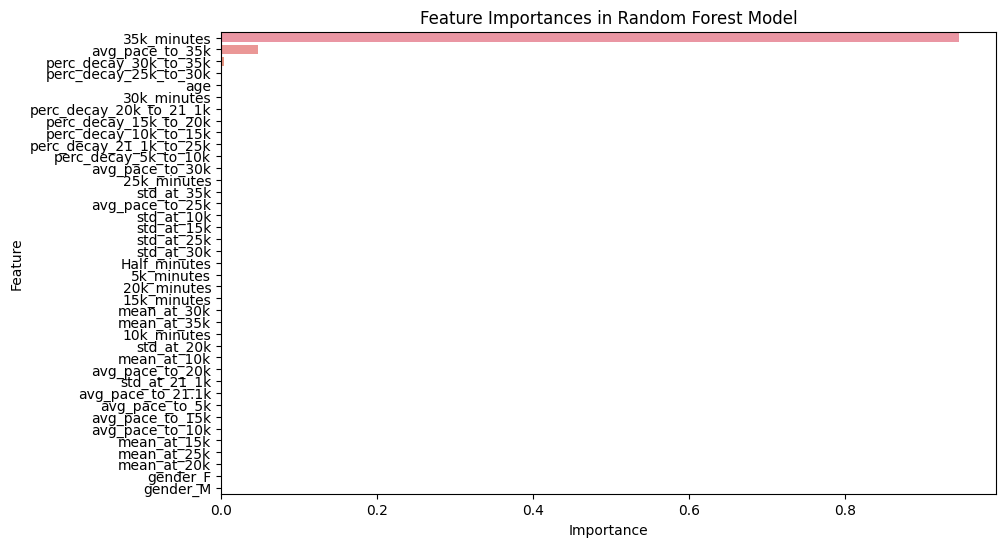

In [7]:
# Get feature importances from the trained RF model
feature_importances = model_rf_25k.feature_importances_

# Create a DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the sorted feature importances
print(importance_df)

# You can also create a plot to visualize the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

## (35k) Recreate the model with the most important features

In [9]:
# Data Preparation

features = ['35k_minutes','avg_pace_to_35k','perc_decay_30k_to_35k']

target = 'finish_minutes'

# Select features and target variable
X = point_35k[features]
y = point_35k[target]

# Scale the features
scaler_rf_35k = MinMaxScaler()
X_scaled_rf_35k = scaler_rf_35k.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_rf_35k, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Random Forest model
# X_train_2d_rf_35k = X_train.reshape(X_train.shape[0], -1)
# X_test_2d_rf_35k = X_test.reshape(X_test.shape[0], -1)

# Create a Random Forest model with the best hyperparameters
model_rf_35k = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    max_features="auto",
    min_samples_split=10,
    min_samples_leaf=2
)

# Fit the model to your training data
model_rf_35k.fit(X_train, y_train)

# Make predictions using the trained Random Forest model
predictions_rf = model_rf_35k.predict(X_test)

## (35k) Save the model and scaler

In [27]:
# Save the model to a file using joblib or pickle
import joblib

joblib.dump(model_lr_35k, 'model_lr_35k.pkl')
joblib.dump(scaler_lr_35k, 'scaler_lr_35k.pkl')

['scaler_lr_35k.pkl']

## (35k) Tune hyperparameters of the Linear Regression Model

In [18]:
# Linear Regression - RMSE: 2.4266651186419113
# Random Forest - RMSE: 2.553428194773701
# SVR - RMSE: 2.421320908044756
# KNN - RMSE: 5.6501325979625765
# Neural Network - RMSE: 2.6542772703500526

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept
    'normalize': [True, False]       # Normalize the features
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Linear Regression model: 2.397543399951747
MAE of the best Linear Regression model: 1.4188680689065194
Best hyperparameters:
fit_intercept: False
normalize: True


## (35k) Tune hyperparameters of the Random Forest Model

In [19]:
# Linear Regression - RMSE: 2.4266651186419113
# Random Forest - RMSE: 2.553428194773701
# SVR - RMSE: 2.421320908044756
# KNN - RMSE: 5.6501325979625765
# Neural Network - RMSE: 2.6542772703500526

# Create a Random Forest model
model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Random Forest model: {rmse}')
print(f'MAE of the best Random Forest model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Random Forest model: 2.4621517411366693
MAE of the best Random Forest model: 1.4634147349285278
Best hyperparameters:
max_depth: 30
max_features: auto
min_samples_leaf: 2
min_samples_split: 10
n_estimators: 200


## (40k) Create X_train, X_test, y_train, y_test

In [28]:
# Data Preparation

# features = ['age', '5k_minutes', '10k_minutes', '15k_minutes', '20k_minutes',
#       'Half_minutes', '25k_minutes', '30k_minutes', '35k_minutes',
#       '40k_minutes', 'gender_F', 'gender_M', 'avg_pace_to_5k', 'avg_pace_to_10k', 'avg_pace_to_15k',
#       'avg_pace_to_20k', 'avg_pace_to_21.1k', 'avg_pace_to_25k',
#       'avg_pace_to_30k', 'avg_pace_to_35k', 'avg_pace_to_40k',
#       'std_at_10k', 'std_at_15k', 'std_at_20k',
#       'std_at_21_1k', 'std_at_25k', 'std_at_30k', 'std_at_35k', 'std_at_40k',
#       'mean_at_10k', 'mean_at_15k', 'mean_at_20k',
#       'mean_at_25k', 'mean_at_30k', 'mean_at_35k', 'mean_at_40k',
#       'perc_decay_5k_to_10k', 'perc_decay_10k_to_15k',
#       'perc_decay_15k_to_20k', 'perc_decay_20k_to_21_1k',
#       'perc_decay_21_1k_to_25k', 'perc_decay_25k_to_30k',
#       'perc_decay_30k_to_35k', 'perc_decay_35k_to_40k']

features = ['35k_minutes','40k_minutes','perc_decay_35k_to_40k','gender_M', 'gender_F']

target = 'finish_minutes'

# Select features and target variable
X = point_40k[features]
y = point_40k[target]

# Scale the features
scaler_lr_40k = MinMaxScaler()
X_scaled = scaler_lr_40k.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Linear Regression model
# X_train_2d = X_train.reshape(X_train.shape[0], -1)
# X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Create Linear Regression model with the best hyperparameters
model_lr_40k = LinearRegression(fit_intercept=False, normalize=True)

# Fit the model to the training data
model_lr_40k.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

## (40k) Tune hyperparameters of the Linear Regression Model

In [21]:
# Linear Regression - RMSE: 0.7903910230750884
# Random Forest - RMSE: 0.9197509753811413
# SVR - RMSE: 0.7822693546989001
# KNN - RMSE: 4.40528754241466
# Neural Network - RMSE: 0.9056408579408128

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept
    'normalize': [True, False]       # Normalize the features
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')


RMSE of the best Linear Regression model: 0.7649980797425956
MAE of the best Linear Regression model: 0.45898702402499686
Best hyperparameters:
fit_intercept: False
normalize: True


## (40k) Tune hyperparameters of the Random Forest Model

In [22]:
# Linear Regression - RMSE: 0.7903910230750884
# Random Forest - RMSE: 0.9197509753811413
# SVR - RMSE: 0.7822693546989001
# KNN - RMSE: 4.40528754241466
# Neural Network - RMSE: 0.9056408579408128

# Create a Random Forest model
model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Random Forest model: {rmse}')
print(f'MAE of the best Random Forest model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

## (40k) Save the Model and Scaler

In [29]:
# Save the model to a file using joblib or pickle
import joblib

joblib.dump(model_lr_40k, 'model_lr_40k.pkl')
joblib.dump(scaler_lr_40k, 'scaler_lr_40k.pkl')

['scaler_lr_40k.pkl']

# Feature importance

## (30k) Feature importance Linear Regression (at 30k)

In [8]:
# Get the coefficients of the best Linear Regression model
coefficients = best_model.coef_

# Map feature names to their respective coefficients
feature_coefficients = {}
for i in range(len(features)):
    feature_coefficients[features[i]] = coefficients[i]

# Sort the features by their coefficients (absolute values)
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print feature importance
print("Feature Importance:")
for feature, coefficient in sorted_feature_coefficients:
    print(f"{feature}: {coefficient}")

Feature Importance:
30k_minutes: -1294.9002066079195
25k_minutes: 1226.3169347021872
avg_pace_to_30k: 1215.3770727122642
Half_minutes: 919.6268132738905
gender_M: 590.6920584660747
gender_F: 589.6991384106126
perc_decay_25k_to_30k: -574.9567152741986
avg_pace_to_25k: -497.35025180208004
avg_pace_to_21.1k: -484.5891484052938
avg_pace_to_20k: -412.4371988038397
10k_minutes: -287.48097957408754
15k_minutes: -270.7292673570799
avg_pace_to_10k: 243.7349929163752
perc_decay_21_1k_to_25k: -168.31313399025296
mean_at_20k: -136.21615013476594
avg_pace_to_15k: 101.7374310944726
mean_at_30k: -82.90723602774892
mean_at_15k: 82.14449284178181
mean_at_25k: -76.70710150801933
avg_pace_to_5k: 58.241531130766674
5k_minutes: 40.61644376668167
perc_decay_15k_to_20k: 39.85006156461469
20k_minutes: -28.199463672395755
perc_decay_10k_to_15k: 27.25603136153781
std_at_30k: -10.64533971208414
std_at_25k: 10.446252583709143
mean_at_10k: -7.185206615171262
std_at_21_1k: -1.7817733079494358
perc_decay_5k_to_10k: 

## (30k) Retrain with less features
- 30k_minutes: -1294.9002066079195
- 25k_minutes: 1226.3169347021872
- avg_pace_to_30k: 1215.3770727122642
- Half_minutes: 919.6268132738905
- gender_M: 590.6920584660747
- gender_F: 589.6991384106126
- perc_decay_25k_to_30k: -574.9567152741986

## (30k) Create X_train, X_test, y_train, y_test

In [11]:
# Data Preparation

features = ['Half_minutes', '25k_minutes', '30k_minutes', 'gender_F', 'gender_M','avg_pace_to_30k','perc_decay_25k_to_30k']

target = 'finish_minutes'

# Select features and target variable
X = point_30k[features]
y = point_30k[target]

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Random Forest model
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

## (30k) Tune hyperparameters of the Linear Regression Model

In [12]:
# Linear Regression - RMSE: 4.255261495220546
# Random Forest - RMSE: 4.404085522954722
# SVR - RMSE: 4.212175895542288
# KNN - RMSE: 6.457935122986385
# Neural Network - RMSE: 4.340476519269012

# Na hyperparameter tuning with all features
# RMSE of the best Linear Regression model: 4.02953401448358
# MAE of the best Linear Regression model: 2.605176649151338
# Best hyperparameters:
# fit_intercept: False, normalize: True

# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept
    'normalize': [True, False]       # Normalize the features
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Linear Regression model: 4.097229708136205
MAE of the best Linear Regression model: 2.6303227886744938
Best hyperparameters:
fit_intercept: True
normalize: True


## (5k) Create X_train, X_test, y_train, y_test

In [15]:
# Data Preparation

features = ['age', '5k_minutes','gender_F', 'gender_M', 'avg_pace_to_5k']

target = 'finish_minutes'

# Select features and target variable
X = point_5k[features]
y = point_5k[target]

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for the Random Forest model
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

## (5k) Tune hyperparameters of the Linear Regression Model

In [16]:
# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept
    'normalize': [True, False]       # Normalize the features
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')

# Fit the grid search to your data
grid_search.fit(X_train_2d, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(X_test_2d)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the RMSE, MAE, and best hyperparameters
print(f'RMSE of the best Linear Regression model: {rmse}')
print(f'MAE of the best Linear Regression model: {mae}')
print('Best hyperparameters:')
for param, value in best_params.items():
    print(f'{param}: {value}')

RMSE of the best Linear Regression model: 11.735621960189633
MAE of the best Linear Regression model: 8.49230884576008
Best hyperparameters:
fit_intercept: False
normalize: True


## (5k) Feature importance Linear Regression (at 5k)

In [17]:
# Get the coefficients of the best Linear Regression model
coefficients = best_model.coef_

# Map feature names to their respective coefficients
feature_coefficients = {}
for i in range(len(features)):
    feature_coefficients[features[i]] = coefficients[i]

# Sort the features by their coefficients (absolute values)
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print feature importance
print("Feature Importance:")
for feature, coefficient in sorted_feature_coefficients:
    print(f"{feature}: {coefficient}")

Feature Importance:
5k_minutes: 356.9252608854185
gender_M: 75.93141446397763
gender_F: 75.53167614506833
avg_pace_to_5k: 55.04661689218372
age: 10.068871963423897
